# Data Preparation

In [17]:
# Setup
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt 
import os

PROJECT_ROOT = ".." 
DIRS = {
    'data':    os.path.join(PROJECT_ROOT, 'outputs', 'data'),
    'models':  os.path.join(PROJECT_ROOT, 'outputs', 'models'),
    'figures': os.path.join(PROJECT_ROOT, 'outputs', 'figures'),
    'results': os.path.join(PROJECT_ROOT, 'outputs', 'results')
}

In [18]:
mat = sio.loadmat('../data/umist_cropped.mat')
faces = mat['facedat'][0]
names = mat['dirnames'][0]

X_list = []
y_list = []

for img_stack, name_arr in zip(faces, names):
    label = name_arr[0]
    h, w, n_i = img_stack.shape
    imgs_flat = img_stack.reshape(h * w, n_i).T
    X_list.append(imgs_flat)
    y_list.extend([label] * n_i)

X = np.vstack(X_list)
y_raw = np.array(y_list)


classes = sorted(set(y_raw))
class_to_idx = {c: i for i, c in enumerate(classes)}
y = np.array([class_to_idx[label] for label in y_raw])

print(f"Total Samples: {X.shape[0]}")
print(f"Feature Vector Size: {X.shape[1]}")

Total Samples: 575
Feature Vector Size: 10304


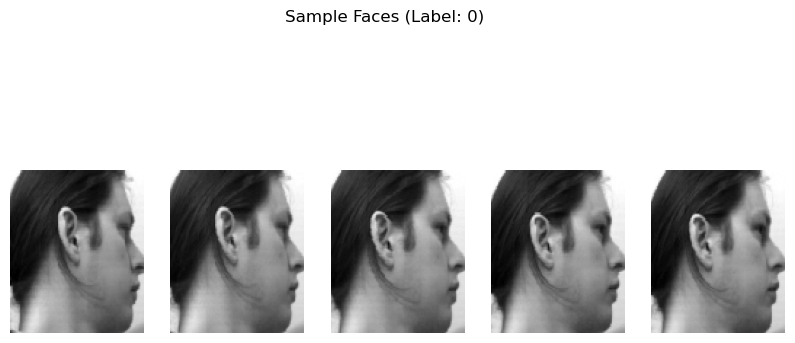

Notebook 1 Complete: Raw data saved to outputs/data/


In [ ]:
# Saving
np.save(f"{DIRS['data']}/X_raw.npy", X)
np.save(f"{DIRS['data']}/y_raw.npy", y)

plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X[i].reshape(112, 92), cmap='gray')
    plt.axis('off')
plt.suptitle(f"Sample Faces (Label: {y[i]})")
plt.savefig(f"{DIRS['figures']}/01_raw_samples.png")
plt.show()